In [2]:
library('GoFKernel')
library('dplyr')
library(tidyverse)
library(lubridate) 
library(scales)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'dplyr' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.3.4 is being loaded, but >= 0.4.10 is required


### Exercise 1
**a)**

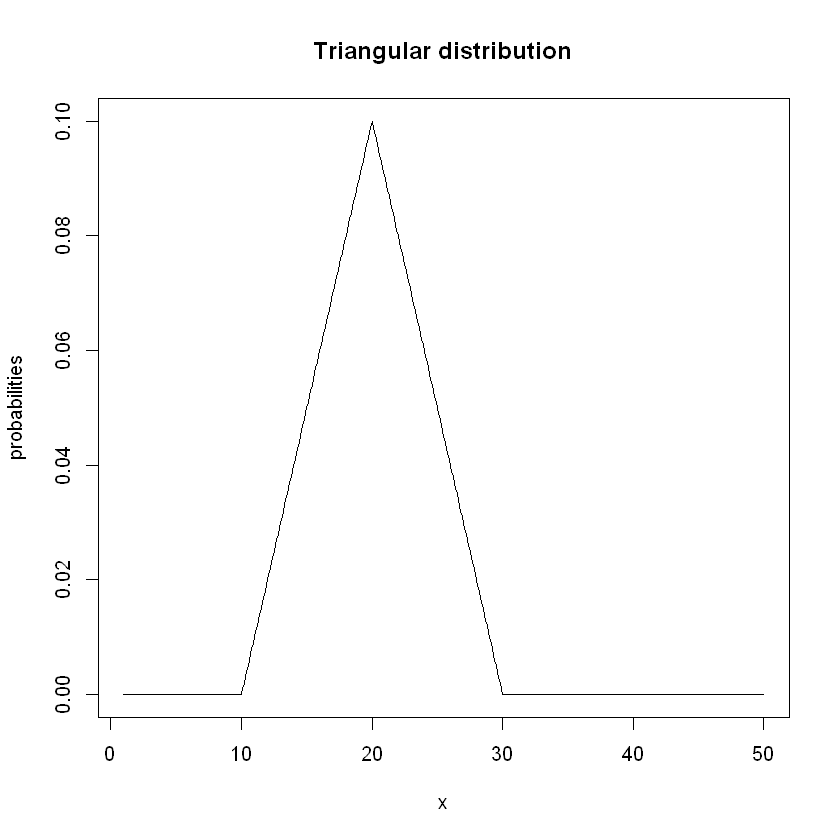

In [3]:
# vertex points
a <- 10
c <- 20
b <- 30
func1 <- function(x){
    f1 <- (2*(x - a))/((b - a)*(c - a))
    f2 <- (2*(b - x))/((b - a)*(b - c))
    f <- ifelse((x>=a & x<c),f1,ifelse(x>=c & x<=b,f2,0))
    return (f)
}
func1 <- Vectorize(func1) 
x <- seq(1, 50, 0.1)
triangolar.dist <- func1(x)
plot(x, triangolar.dist, type='l', main='Triangular distribution', ylab='probabilities')

**b - c)** in order to obtain the random generator function i need to create the cumulative distribution function and then, passing by the inverse one, build the random generator:

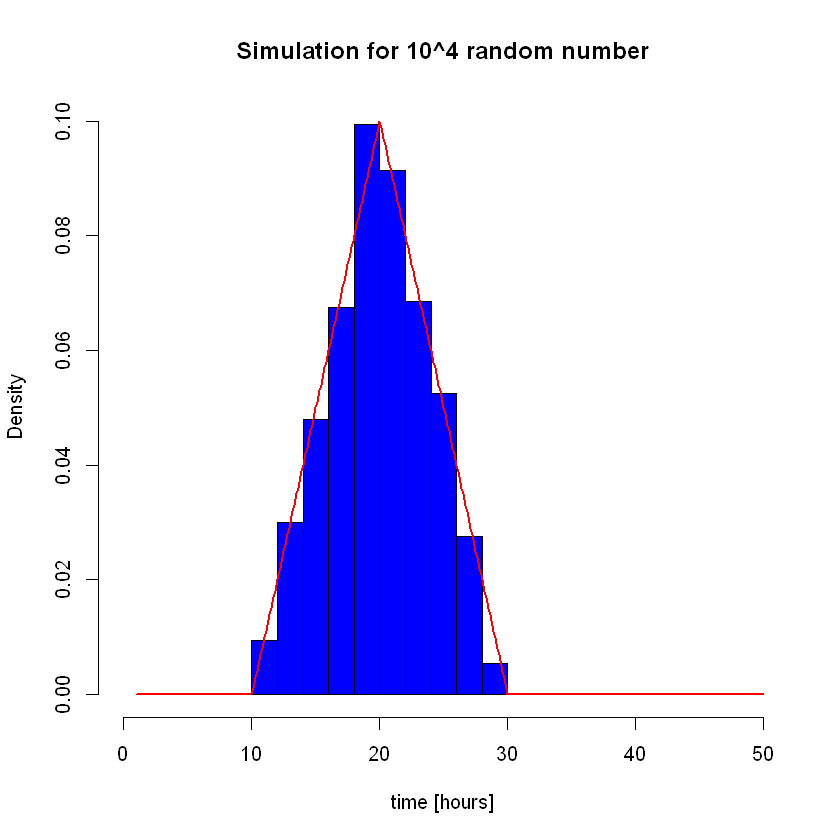

In [4]:
cfunc1 <- function(x){
    cdf <- ifelse(x>100,1,integrate(func1,lower=0,upper=x)$value)
    return (cdf)
}
cfunc1 <- Vectorize(cfunc1)
rfunc1 <- function(N){
    points <- runif(N)
    rand_func <- Vectorize(inverse(cfunc1,0,50))
    return (rand_func(points))
}

N <- 10000
random_values <- rfunc1(N)
hist(random_values, prob = TRUE, main='Simulation for 10^4 random number', xlab='time [hours]',
    xlim=c(0,50), ylim=c(0,max(func1(x))), col="blue")
lines(x, func1(x), col = 2, lwd = 2)

### Exercise 2

First of all we need to compute the expectation values for the different
distributions:

a)  Exponential distribution $$
    \frac{1}{\lambda=1} = 1 
    $$

b)  Uniform distribution $$
    (a=3+b=5)/2 = 4
    $$

c)  Binomial distribution $$
    n \cdot p=1 \cdot \frac{1}{2} = 0.5 
    $$

d)  Poisson distribution $$
    \lambda = 1/2
    $$

In [5]:
Exp_exp  <- 1   
Exp_unif <- 4   
Exp_bin  <- 1/2 
Exp_pois <- 1/2 
# Functions G(k) 
G_exp  <- function(k) {1- pexp(k, 1)}         
G_unif <- function(k) {1- punif(k, 3, 5)}     
G_bin  <- function(k) {1- pbinom(k, 1, 1/2)}  
G_pois <- function(k) {1- ppois(k, 1/2)}
# Markov's limits
Markov_lim <- function(k, E) { E/k }

**a)** Exponential distribution

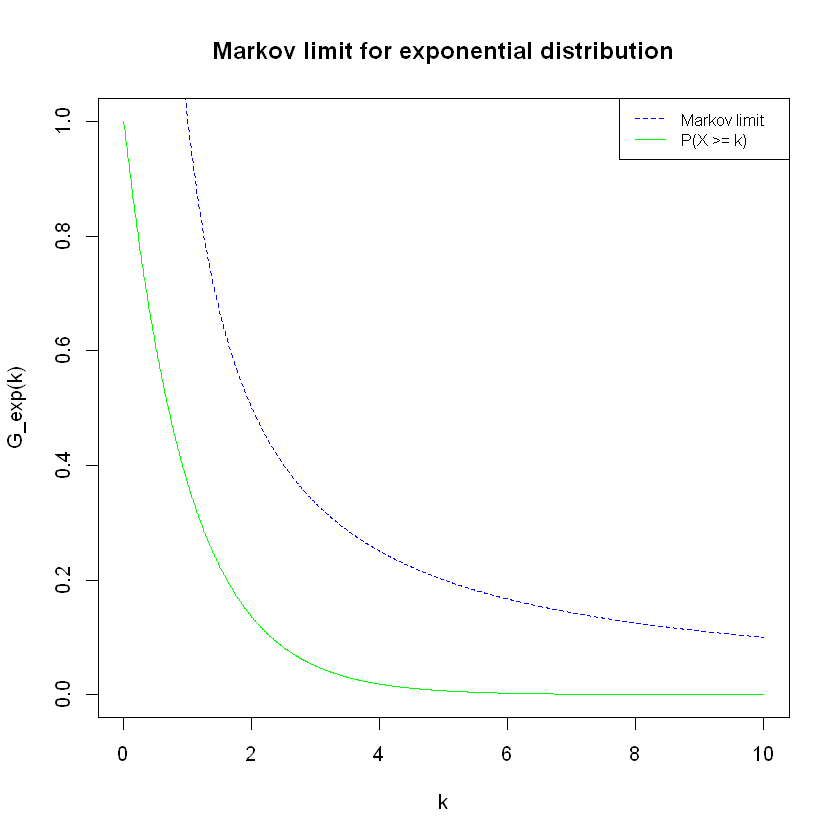

In [6]:
k <-seq(0, 10, 0.01)
plot(k, G_exp(k), type='l', col='green', main='Markov limit for exponential distribution')
lines(k, Markov_lim(k, Exp_exp), col='blue', lty=2)
legend(x='topright', legend=c("Markov limit", "P(X >= k)"),
       col=c("blue", "green"), lty=2:1, cex=0.8)

**b)** Uniform distribution $U(3,5)$

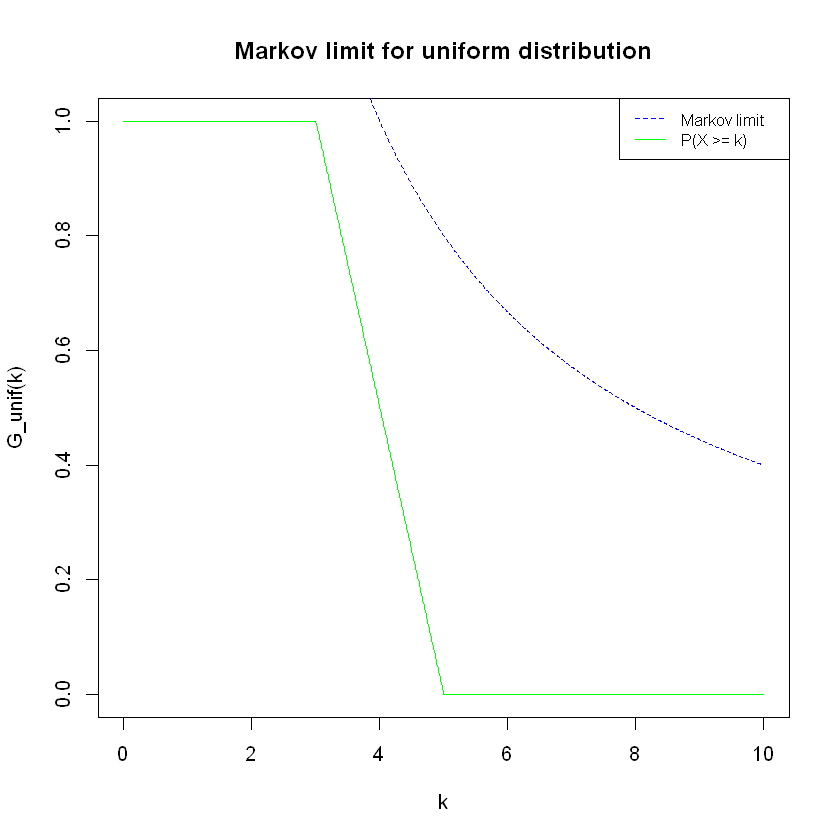

In [7]:
plot(k, G_unif(k), type='l', col='green', main='Markov limit for uniform distribution')
lines(k, Markov_lim(k, Exp_unif), col='blue', lty=2)
legend(x='topright', legend=c("Markov limit", "P(X >= k)"),
       col=c("blue", "green"), lty=2:1, cex=0.8)

**c)** Binomial distribution $Bin(n=1,p=1/2)$

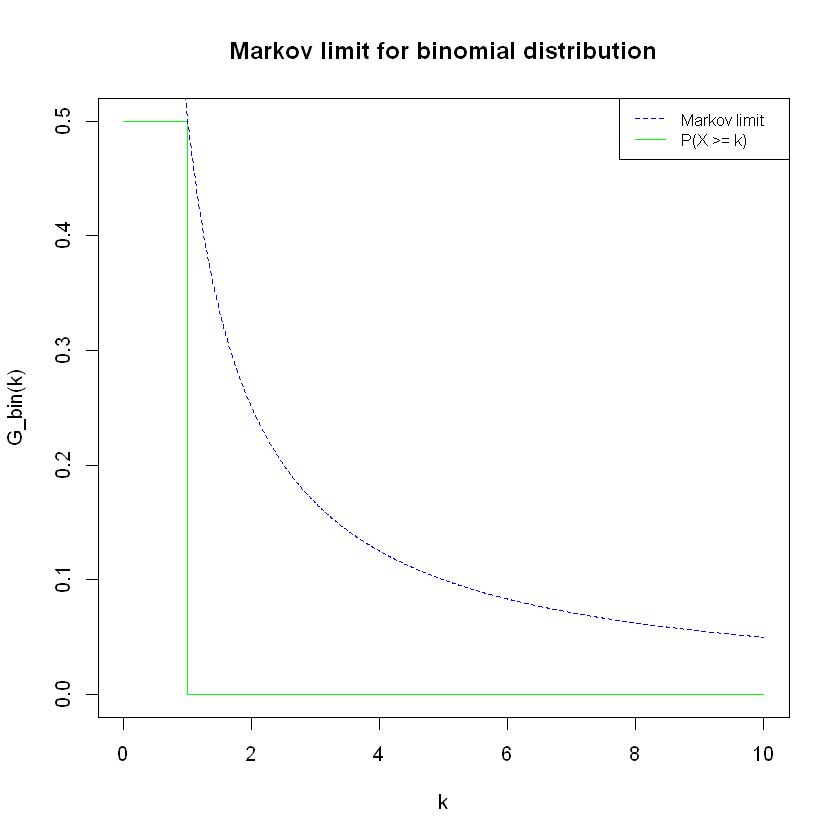

In [8]:
plot(k, G_bin(k), type='l', col='green', main='Markov limit for binomial distribution')
lines(k, Markov_lim(k, Exp_bin), col='blue', lty=2)
legend(x='topright', legend=c("Markov limit", "P(X >= k)"),
       col=c("blue", "green"), lty=2:1, cex=0.8)

**d)** Poisson distribution $\lambda=1/2$

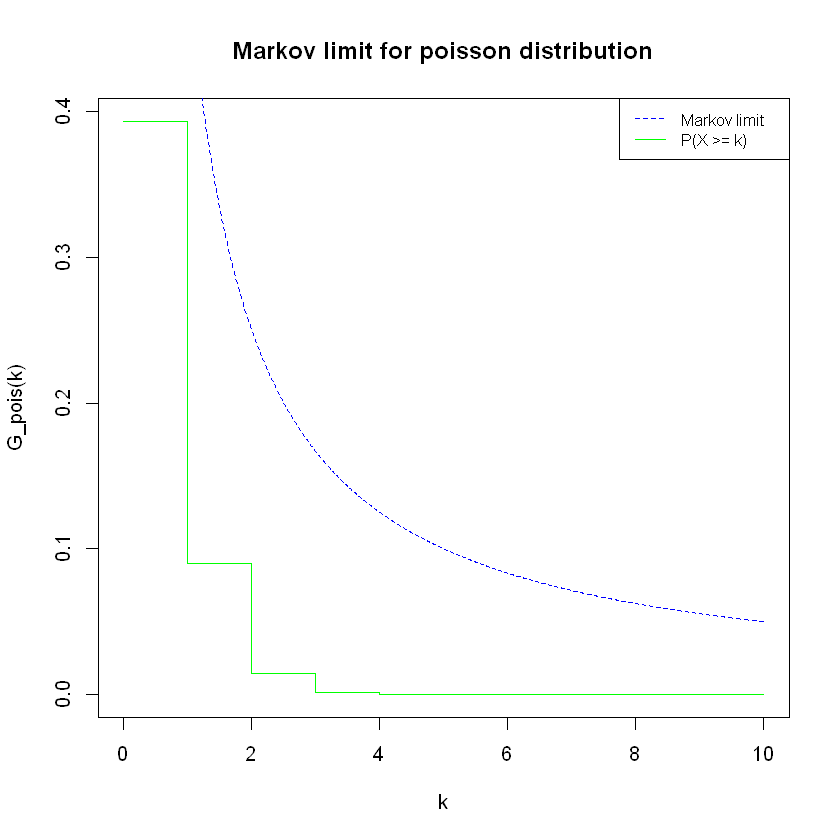

In [9]:
plot(k, G_pois(k), type='l', col='green', main='Markov limit for poisson distribution')
lines(k, Markov_lim(k, Exp_pois), col='blue', lty=2)
legend(x='topright', legend=c("Markov limit", "P(X >= k)"),
       col=c("blue", "green"), lty=2:1, cex=0.8)

### Exercise 3

Left term of of Chebyshev's inequalty can be expressed as:

$$
-k \sigma \leq (X - \mu) \leq k \sigma = -k \sigma + \mu \leq X \leq k \sigma + \mu 
$$

Then:

$$
P(|X - \mu | \geq k \sigma) = F(k \sigma + \mu) - F(-k \sigma + \mu)
$$

Then we compute $\mu$ and $\sigma$ for all the distributions:

a)  $\mu = 3$; $\sigma = 5$, Normal distribution

b)  $\mu = 1/ \lambda = 1$; $\sigma = 1/ \lambda = 1$, Exponential
    distribution

c)  $\mu = (a+b)/2 = 1$; $\sigma = 2/ \sqrt(6)$, Uniform distribution

d)  $\mu = \lambda = 1/3$;

In [10]:
# defining the Chebyshev's limit
Cheb_lim  <- function(k) {1- (1/k)^2}

**a)** Normal distribution

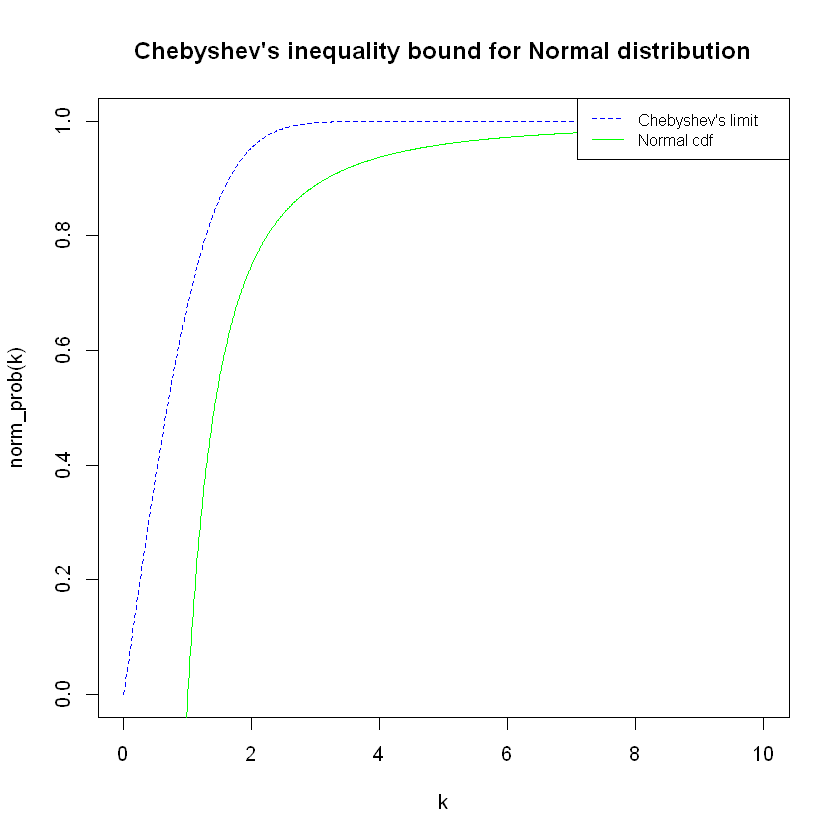

In [11]:
exp_norm <- 3         
s_norm <- 5
norm_prob <- Vectorize(function(k){pnorm(k*s_norm + exp_norm, exp_norm, s_norm) - pnorm(-k*s_norm + exp_norm, exp_norm, s_norm)})
plot(k, norm_prob(k), type='l', lty=2, col='blue', main='Chebyshev\'s inequality bound for Normal distribution')
lines(k, Cheb_lim(k), col='green')
legend(x='topright', legend=c("Chebyshev's limit", "Normal cdf"),
       col=c("blue", "green"), lty=2:1, cex=0.8)

**b)** Exponential distribution

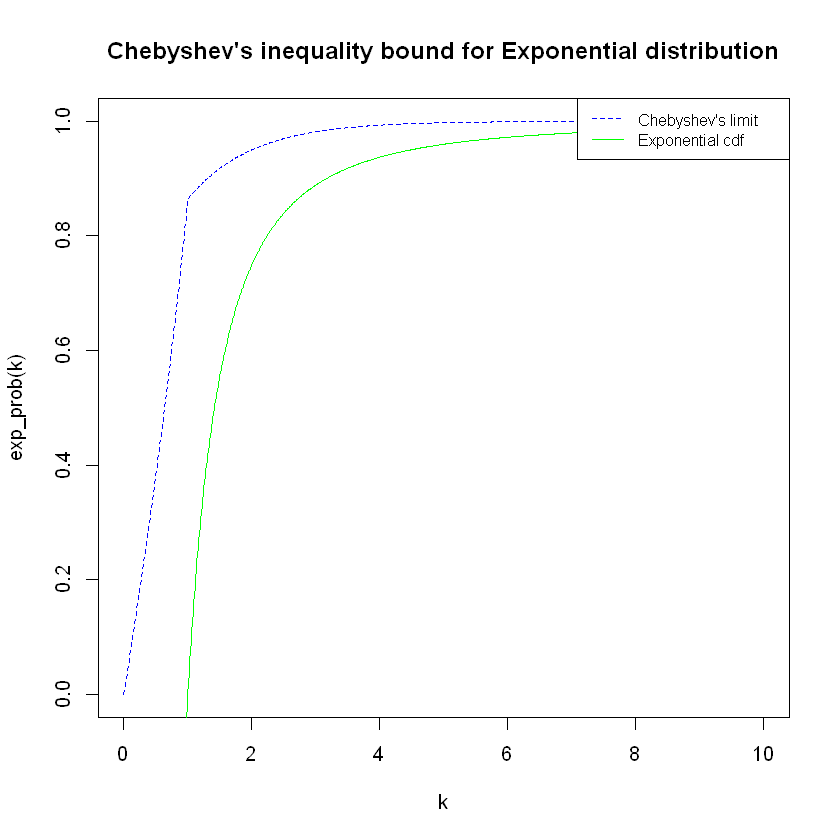

In [12]:
exp_exp <- 1         
s_exp <- 1
exp_prob <- Vectorize(function(k){pexp(k*s_exp + exp_exp, exp_exp) - pexp(-k*s_exp + exp_exp, exp_exp)})
plot(k, exp_prob(k), type='l', lty=2, col='blue', main='Chebyshev\'s inequality bound for Exponential distribution')
lines(k, Cheb_lim(k), col='green')
legend(x='topright', legend=c("Chebyshev's limit", "Exponential cdf"),
       col=c("blue", "green"), lty=2:1, cex=0.8)

**c)** Uniform distribution

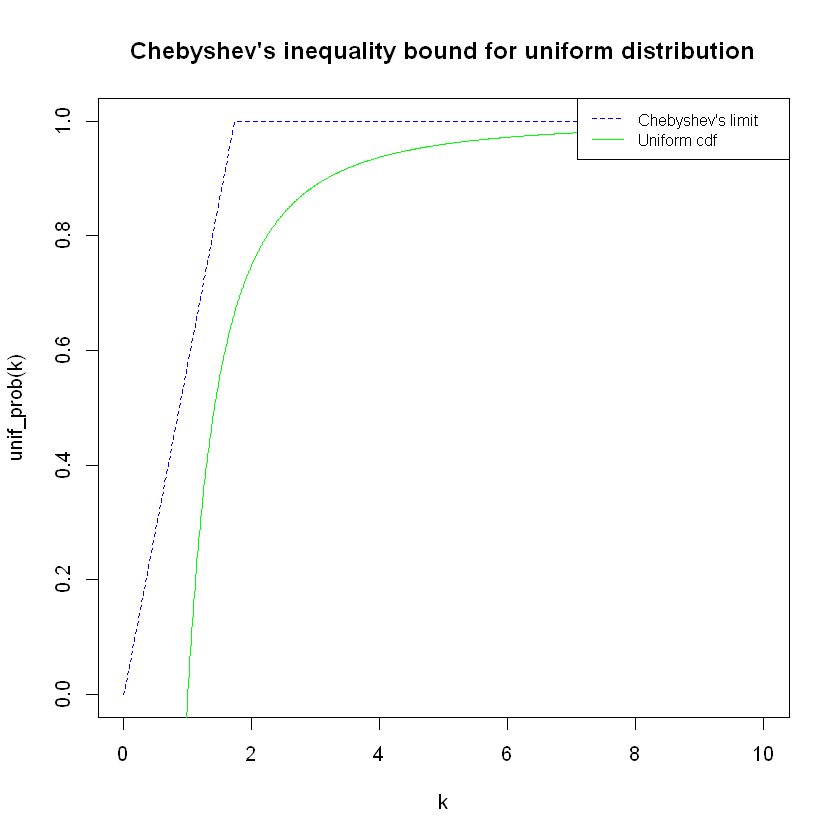

In [13]:
exp_unif <- 1         
s_unif <- 0.817 #R gives error with "2/sqrt(6)" but can't understand why
unif_prob <- Vectorize(function(k){
    punif(k*s_unif + exp_unif,1-sqrt(2), 1+sqrt(2)) - punif(-k*s_unif + exp_unif,1-sqrt(2), 1+sqrt(2))})
plot(k, unif_prob(k), type='l', lty=2, col='blue', main='Chebyshev\'s inequality bound for uniform distribution')
lines(k, Cheb_lim(k), col='green')
legend(x='topright', legend=c("Chebyshev's limit", "Uniform cdf"),
       col=c("blue", "green"), lty=2:1, cex=0.8)

**d)** Poisson Distribution

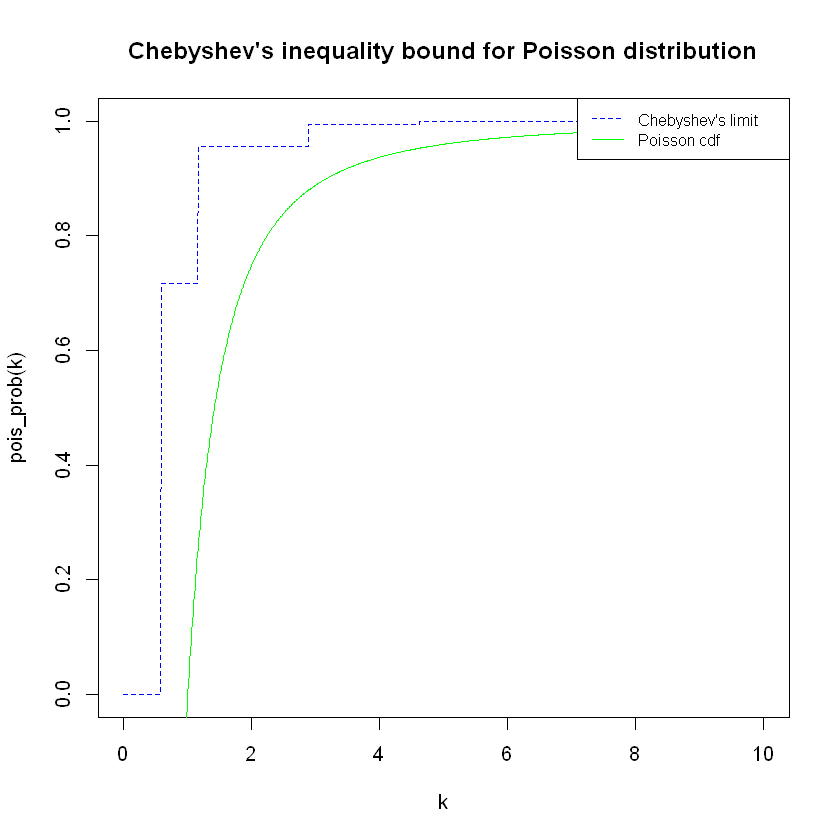

In [14]:
lambda_pois <- 1/3         
s_pois <- sqrt(lambda_pois)
pois_prob <- Vectorize(function(k){
    ppois(k*s_pois+lambda_pois, lambda_pois) - ppois(- k*s_pois+lambda_pois, lambda_pois)})
plot(k, pois_prob(k), type='l', col='blue', lty=2, main='Chebyshev\'s inequality bound for Poisson distribution')
lines(k, Cheb_lim(k), col='green', lty=1)
legend(x='topright', legend=c("Chebyshev's limit", "Poisson cdf"),
       col=c("blue", "green"), lty=2:1, cex=0.8)

### Exercise 4

In [17]:
# updating function for each trial
update <- function(ball, prior){
    
    p.E_H <- c(0,1/5, 2/5, 3/5, 4/5, 1)
    
    if (ball == 0) {
        evidence <- sum(p.E_H * prior)
        prior <- (prior*p.E_H)/evidence
        
    }
    
    if (ball == 1) {
        p.E_H <- (1-p.E_H)
        evidence <- sum(p.E_H * prior)
        prior <- (prior*p.E_H)/evidence
        
    }
    results = list(prior, evidence)
    return (results)
}

In [16]:
#initial prior
prior <- rep(1/6, 6)
p.E_H <- c(0,1/5,2/5,3/5,4/5,1)
evidence <-sum(prior*p.E_H)
df <- data.frame(prior)

ball  <- 0 
counter <- 0
cat("insert next command:\n0 - black ball\n1 - white ball\n's' - stop game\n\n")
while(ball != 's'){


ball <- readline(prompt="insert next command:  ")
if ( ball == 's') {
        Sys.sleep(0.001)
        print("Experiment stopped")
        flush.console() #shows current output to console
        break
}
trial <- update(ball, prior)
prior <- trial[[1]]
evidence <- trial[[2]]
counter <- counter + 1
new <- prior
df <- cbind(df,round(new,3)) 
# df <- rbind(df, c(counter, ball, prior, evidence))
Sys.sleep(0.001)    
cat('Trial = ', counter,'P(H0) = ', prior[1], 'P(H1) = ', prior[2], 'P(H2) = ', prior[3], 'P(H3) = ', prior[4], 'P(H4) = ', prior[5], 'P(H5) = ', prior[6])
flush.console() #shows current output to console
}    
col_names <- 0:counter
colnames(df) <- col_names

insert next command:
0 - black ball
1 - white ball
's' - stop game

insert next command:  1
Trial =  1 P(H0) =  0.3333333 P(H1) =  0.2666667 P(H2) =  0.2 P(H3) =  0.1333333 P(H4) =  0.06666667 P(H5) =  0insert next command:  1
Trial =  2 P(H0) =  0.4545455 P(H1) =  0.2909091 P(H2) =  0.1636364 P(H3) =  0.07272727 P(H4) =  0.01818182 P(H5) =  0insert next command:  1
Trial =  3 P(H0) =  0.5555556 P(H1) =  0.2844444 P(H2) =  0.12 P(H3) =  0.03555556 P(H4) =  0.004444444 P(H5) =  0insert next command:  1
Trial =  4 P(H0) =  0.6384065 P(H1) =  0.2614913 P(H2) =  0.08273749 P(H3) =  0.01634321 P(H4) =  0.00102145 P(H5) =  0insert next command:  0
Trial =  5 P(H0) =  0 P(H1) =  0.5446809 P(H2) =  0.3446809 P(H3) =  0.1021277 P(H4) =  0.008510638 P(H5) =  0insert next command:  1
Trial =  6 P(H0) =  0 P(H1) =  0.6360248 P(H2) =  0.3018634 P(H3) =  0.05962733 P(H4) =  0.002484472 P(H5) =  0insert next command:  0
Trial =  7 P(H0) =  0 P(H1) =  0.4452174 P(H2) =  0.4226087 P(H3) =  0.1252174 P(

In [18]:
df

0,1,2,3,4,5,6,7,8
0.1666667,0.333,0.455,0.556,0.638,0.000,0.000,0.000,0.000
0.1666667,0.267,0.291,0.284,0.261,0.545,0.636,0.445,0.539
0.1666667,0.200,0.164,0.120,0.083,0.345,0.302,0.423,0.383
0.1666667,0.133,0.073,0.036,0.016,0.102,0.060,0.125,0.076
0.1666667,0.067,0.018,0.004,0.001,0.009,0.002,0.007,0.002
0.1666667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


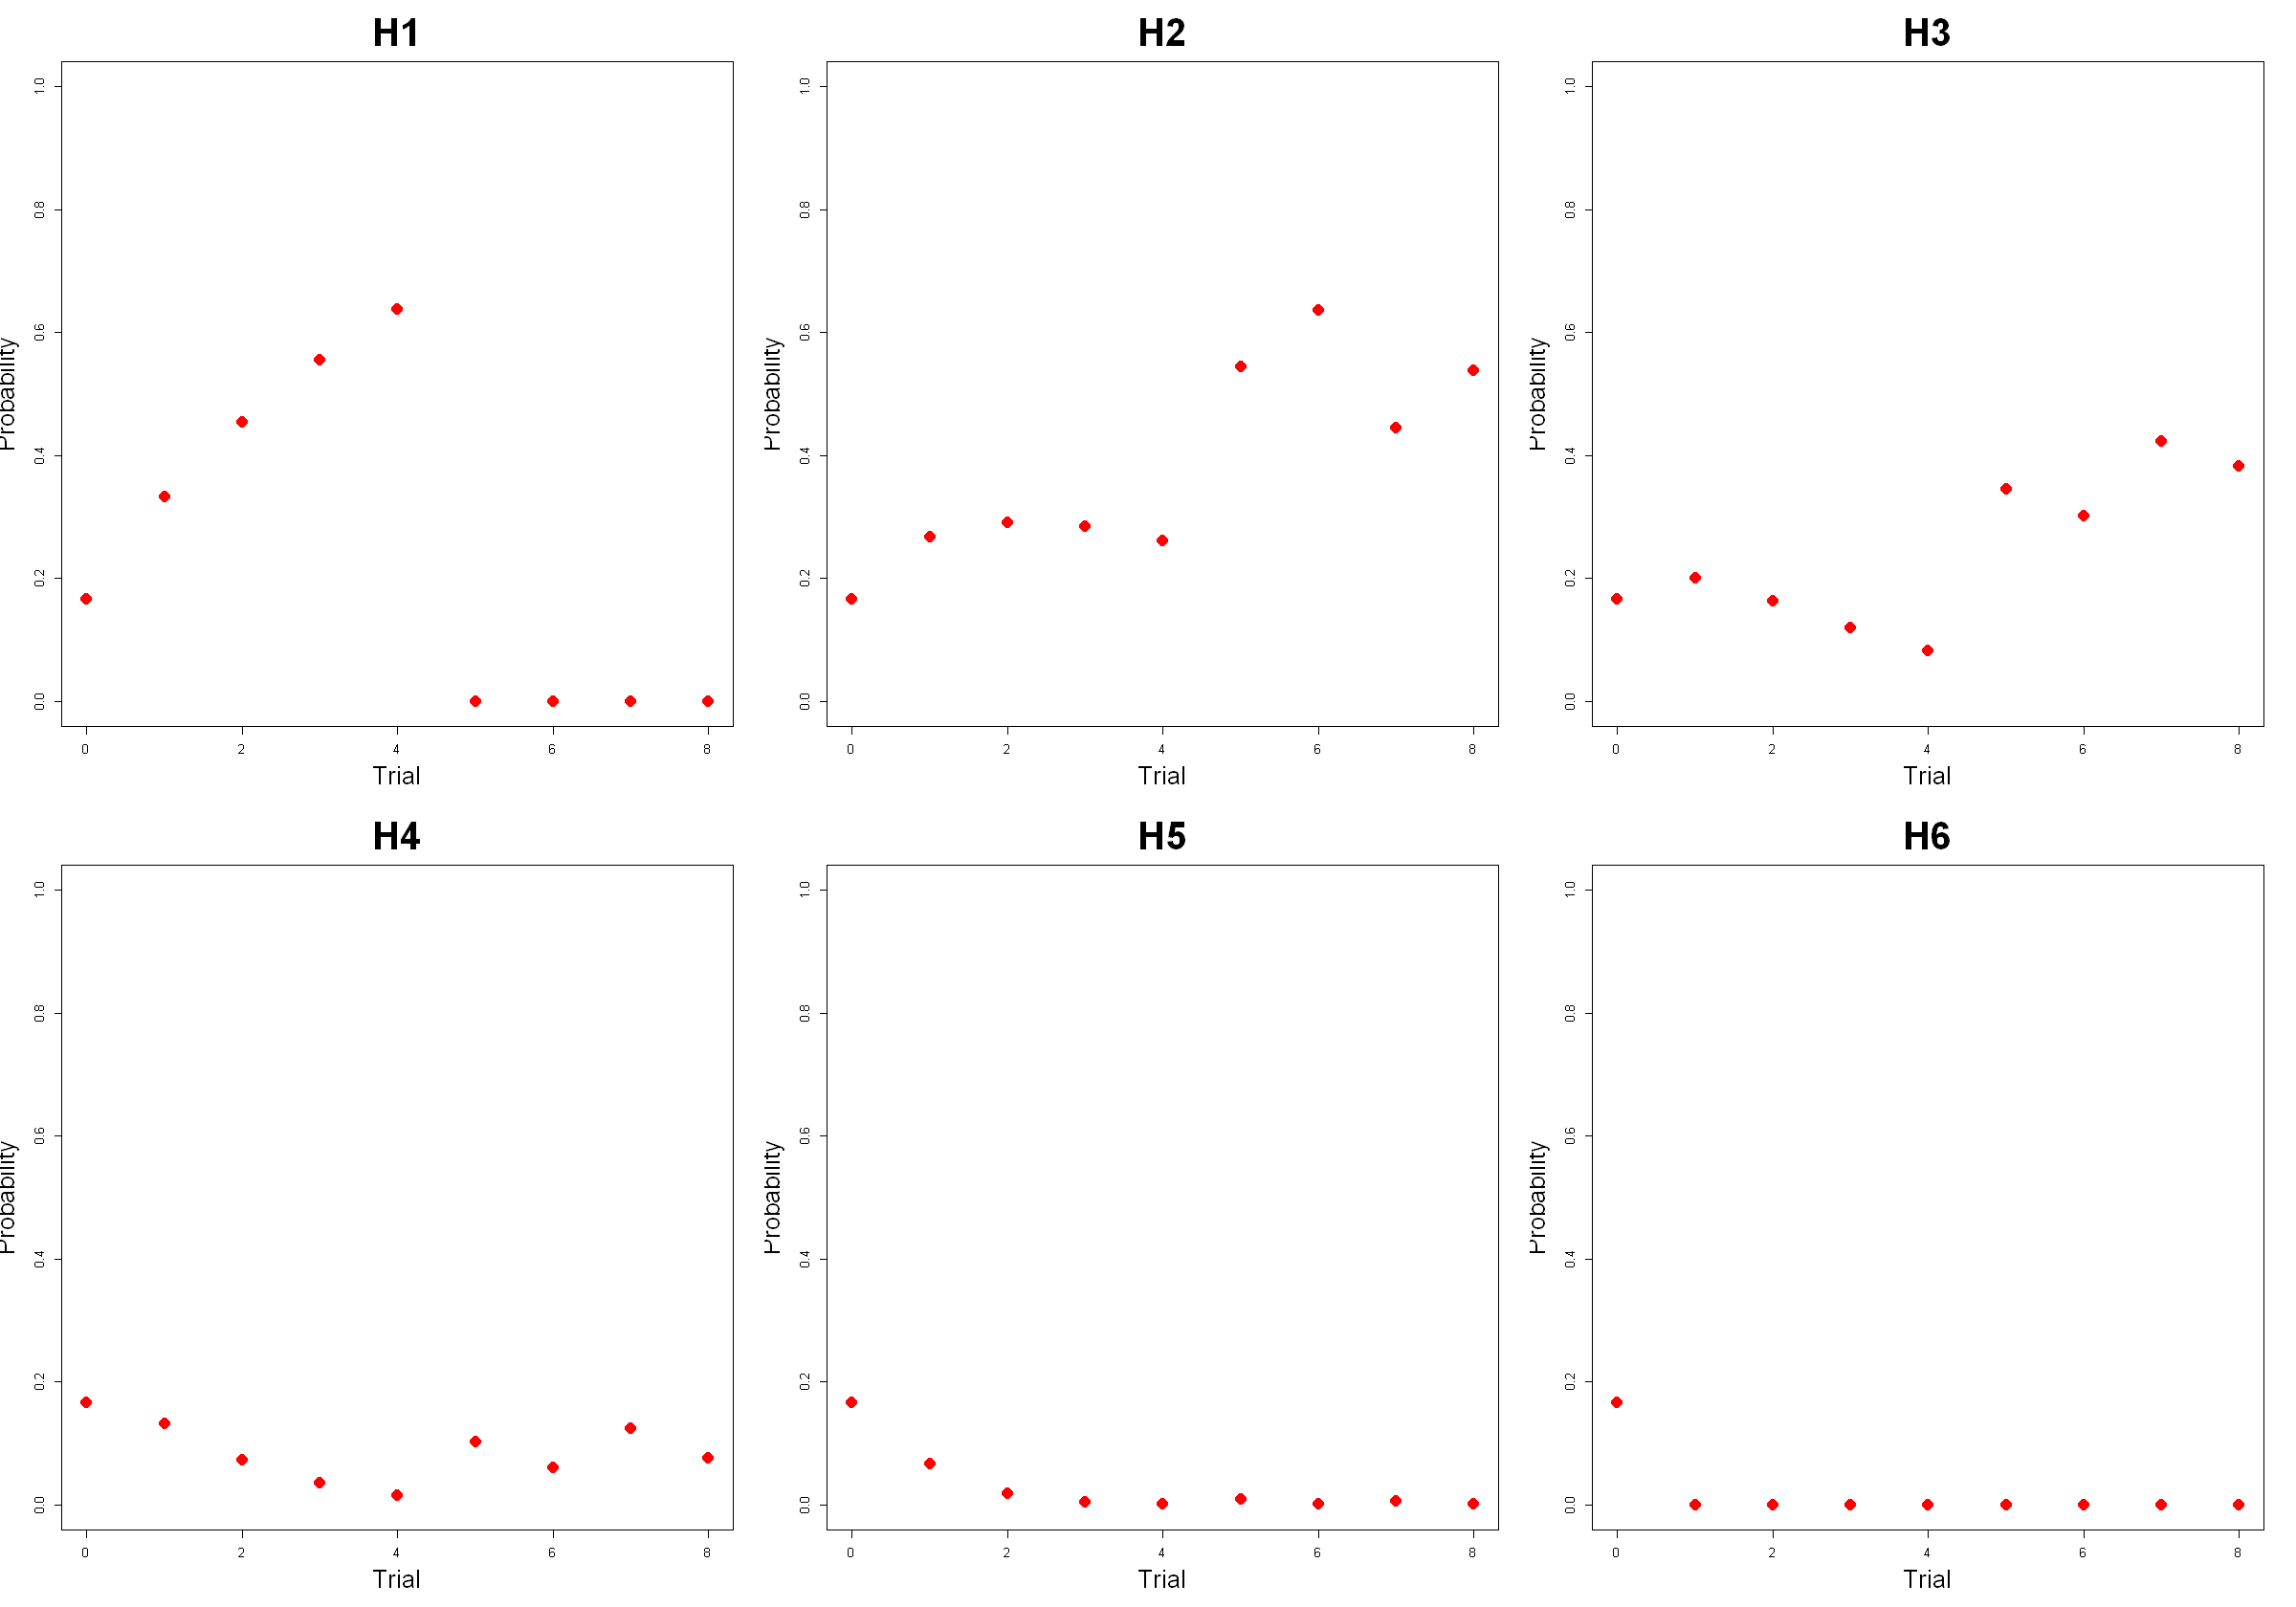

In [19]:
# plots 

par(mfrow=c(2,3))
options(repr.plot.width = 20, repr.plot.height = 14)
for (i in 1:6) {
    
    plot(col_names, df[i,], main = paste("H", i, sep = ""), ylim=c(0,1), type = "p", col="red", 
         pch = 16, cex = 2, xlab = "Trial", ylab = "Probability", 
         cex.lab=2, cex.main = 3)
    
}

### Exercise 5

In [90]:
n_samples <- 30
box <- sample.int(6, 1, replace=TRUE) - 1
prior <- rep(1/6, 6)
p.E_H <- c(0,1/5,2/5,3/5,4/5,1)
evidence <-sum(prior*p.E_H)
df <- data.frame(prior)

In [91]:
cat('Box chosen:  H', box+1)
counter <- 0
while (counter<n_samples){
    x <- runif(1, 0, 1)
    if (x<box/5) {ball <- 0} else {ball <- 1}
    cat('\ntrial', counter+1,'  ball: ', ball)
    trial <- update(ball, prior)
    prior <- trial[[1]]
    evidence <- trial[[2]]
    counter <- counter + 1
    new <- prior
    df <- cbind(df,round(new,3))
}
col_names <- 0:counter
colnames(df) <- col_names
df

Box chosen:  H 3
trial 1   ball:  1
trial 2   ball:  0
trial 3   ball:  0
trial 4   ball:  1
trial 5   ball:  0
trial 6   ball:  1
trial 7   ball:  1
trial 8   ball:  1
trial 9   ball:  1
trial 10   ball:  1
trial 11   ball:  0
trial 12   ball:  1
trial 13   ball:  1
trial 14   ball:  1
trial 15   ball:  0
trial 16   ball:  0
trial 17   ball:  1
trial 18   ball:  1
trial 19   ball:  1
trial 20   ball:  1
trial 21   ball:  1
trial 22   ball:  1
trial 23   ball:  0
trial 24   ball:  0
trial 25   ball:  1
trial 26   ball:  1
trial 27   ball:  0
trial 28   ball:  1
trial 29   ball:  1
trial 30   ball:  1

0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0.1666667,0.333,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.1666667,0.267,0.2,0.08,0.154,0.062,0.114,0.183,0.263,0.349,...,0.533,0.605,0.432,0.273,0.336,0.405,0.252,0.312,0.378,0.449
0.1666667,0.200,0.3,0.24,0.346,0.277,0.386,0.463,0.499,0.498,...,0.456,0.388,0.554,0.700,0.647,0.585,0.729,0.676,0.614,0.547
0.1666667,0.133,0.3,0.36,0.346,0.415,0.386,0.309,0.222,0.147,...,0.012,0.007,0.014,0.027,0.017,0.010,0.019,0.012,0.007,0.004
0.1666667,0.067,0.2,0.32,0.154,0.246,0.114,0.046,0.016,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.1666667,0.000,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Box chosen:  H 3

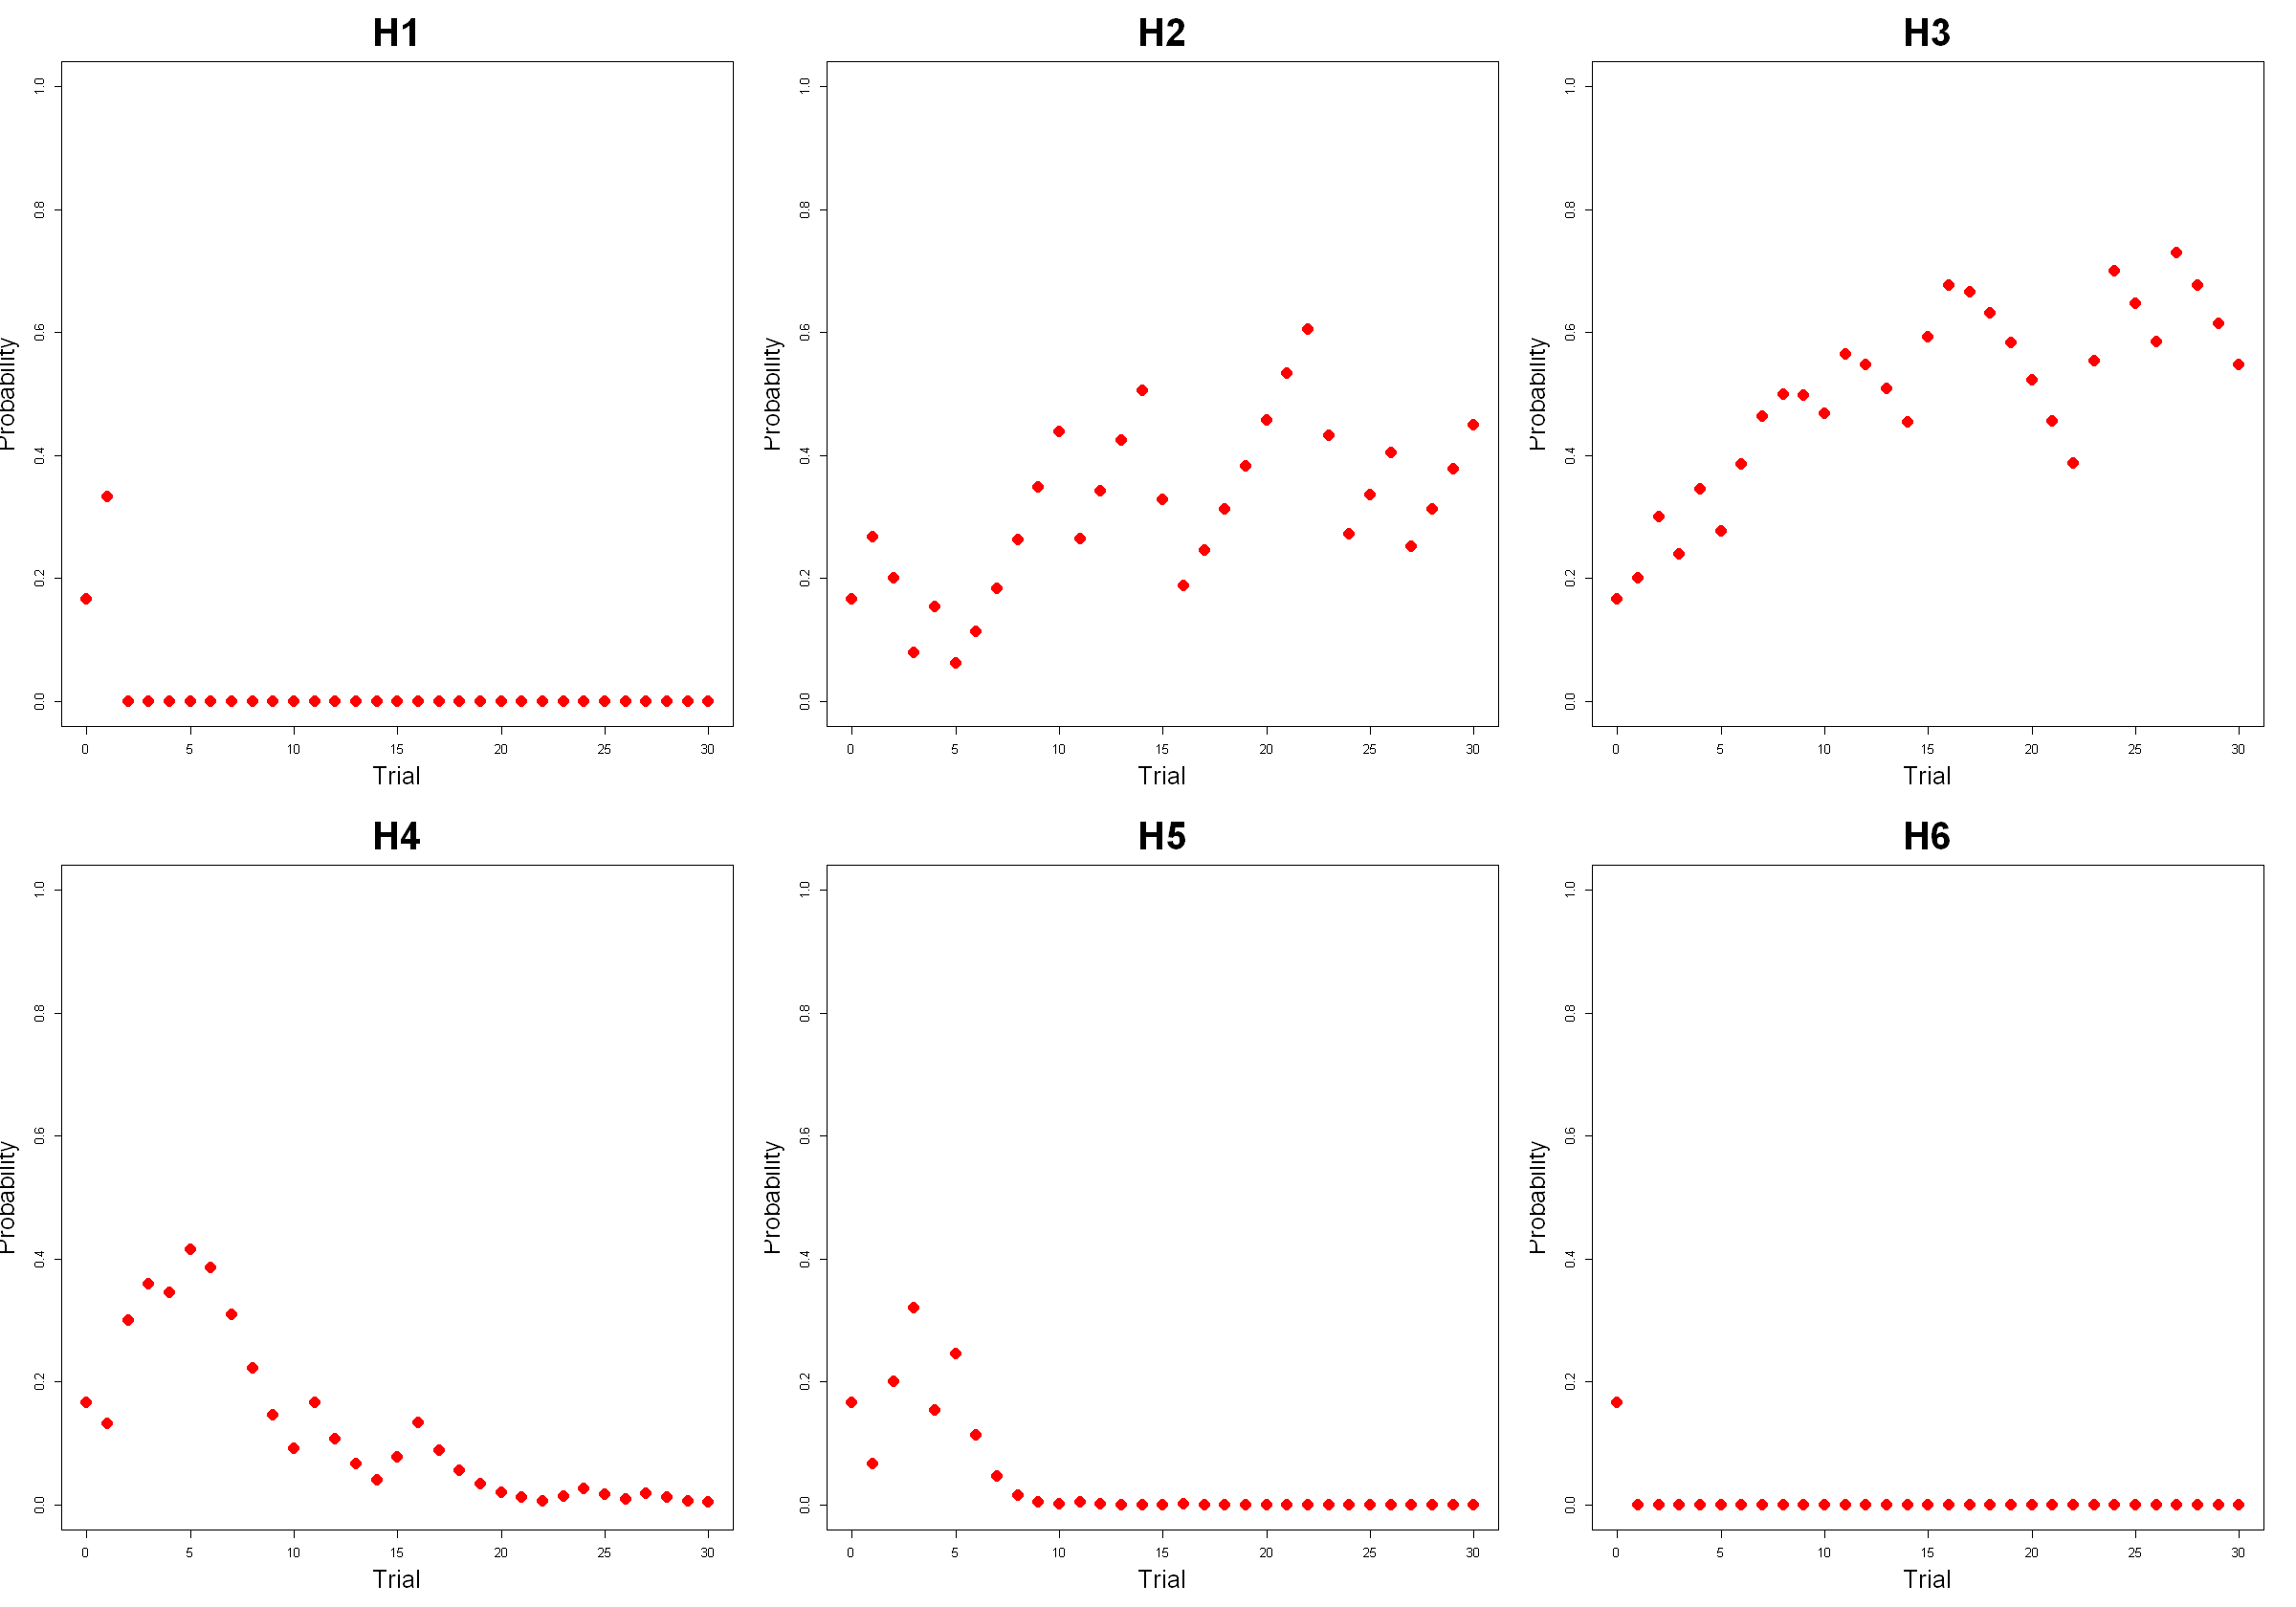

In [92]:
cat('Box chosen:  H', box+1)

# plots 
par(mfrow=c(2,3))
options(repr.plot.width = 20, repr.plot.height = 14)
for (i in 1:6) {
    
    plot(col_names, df[i,], main = paste("H", i, sep = ""), ylim=c(0,1), type = "p", col="red", 
         pch = 16, cex = 2, xlab = "Trial", ylab = "Probability", 
         cex.lab=2, cex.main = 3)
    
}